<a href="https://colab.research.google.com/github/Haniaakanwal/DIP-TASK/blob/main/DIP_TASK_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving IMG-20251022-WA0022.jpg to IMG-20251022-WA0022.jpg


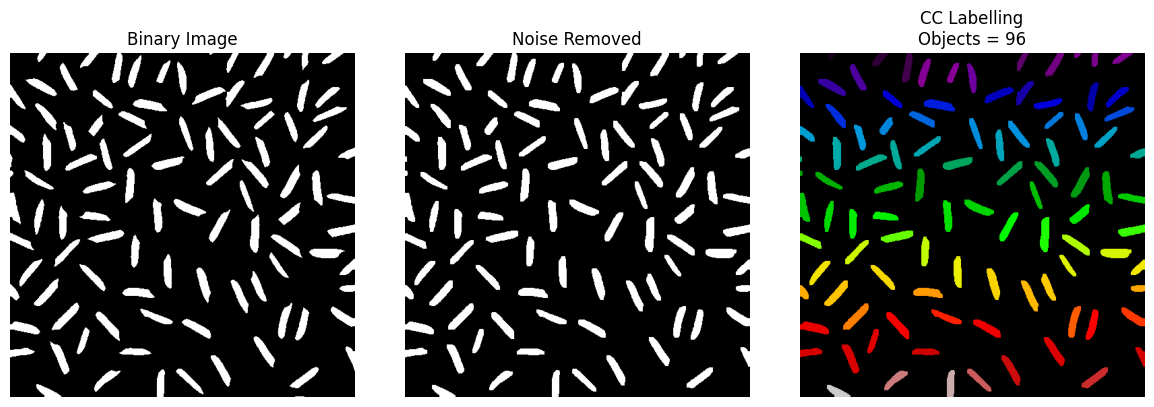

Total number of objects: 96


In [1]:

from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload same image
uploaded = files.upload()
image_name = list(uploaded.keys())[0]

# Read image
img = cv2.imread(image_name)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Otsu's thresholding (better than fixed 127)
_, binary = cv2.threshold(gray, 0, 255,
                          cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Morphological opening to remove noise
kernel = np.ones((3, 3), np.uint8)
binary_clean = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

# Connected Component Labeling with stats
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_clean)

# Filter small components by area
min_area = 95   # adjust if needed
object_count = 0

for i in range(1, num_labels):  # skip background
    if stats[i, cv2.CC_STAT_AREA] >= min_area:
        object_count += 1

# Display results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Binary Image")
plt.imshow(binary, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Noise Removed")
plt.imshow(binary_clean, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"CC Labelling\nObjects = {object_count}")
plt.imshow(labels, cmap='nipy_spectral')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Total number of objects:", object_count)

